# Performance

Here we'll look at the performance impact of using `multiprocessing` and GPU acceleration.

In [1]:
from phomo import Mosaic, Master, Pool

/home/lcoyle/.cache/pypoetry/virtualenvs/phomo-pX3Qwu7w-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))

Loading tiles: 100%|█████████████████████████████████████████████████████████████████| 9780/9780 [00:04<00:00, 2179.05it/s]


In [3]:
from pathlib import Path

master_file = list(Path("faces").glob('*'))[5346]

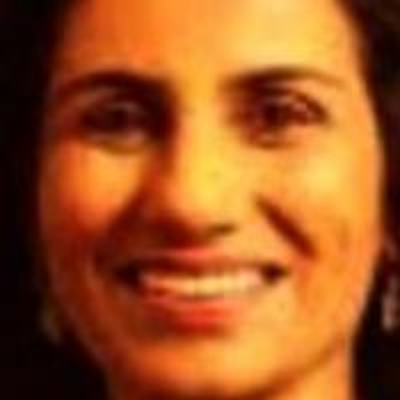

In [4]:
master = Master.from_file(master_file, img_size=(400, 400))
master.img

In [5]:
mosaic = Mosaic(master, pool)

## Serial computation

This is the baseline.

In [6]:
%time mosaic.build(mosaic.d_matrix());

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 267323.39it/s]

CPU times: user 9.56 s, sys: 7.5 s, total: 17.1 s
Wall time: 17.1 s


## Multiple cores

Let's use `multiprocessing` to parallelize over the CPU cores.

> Using multple cores somewhat breaks the tqdm progress bar.

In [7]:
%time mosaic.build(mosaic.d_matrix(workers=2));

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 183437.74it/s]

CPU times: user 346 ms, sys: 84.7 ms, total: 431 ms
Wall time: 10.8 s


In [8]:
%time mosaic.build(mosaic.d_matrix(workers=4));

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 222303.11it/s]

CPU times: user 388 ms, sys: 92.3 ms, total: 480 ms
Wall time: 9.6 s


In [9]:
%time mosaic.build(mosaic.d_matrix(workers=8));

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 215922.99it/s]

CPU times: user 503 ms, sys: 282 ms, total: 785 ms
Wall time: 10.1 s


In [10]:
%time mosaic.build(mosaic.d_matrix(workers=16));

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 158664.80it/s]

CPU times: user 962 ms, sys: 540 ms, total: 1.5 s
Wall time: 12 s


On my system it seems using more that when going above 4 cores, the overhead slows downs the computation.

## Running on GPU

Now let's run  it on the GPU requires installing with `pip install 'phomo[cuda]'`. Here, on a `RTX 2060 SUPER`. 

In [11]:
%timeit mosaic.build(mosaic.d_matrix_cuda());

Building mosaic: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 162036.08it/s]

512 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
17.1 / 0.512

33.3984375

Running on GPU gives a ~30x performance increase compared to baseline.